In [30]:
import tensorflow as tf
 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
 
# Import Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from pandas import get_dummies

In [31]:
mnist = tf.keras.datasets.mnist
(train_features,train_labels), (test_features,test_labels) = mnist.load_data()

In [32]:
train_features, test_features = train_features / 255.0, test_features / 255.0

In [34]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 20 , activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [35]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(train_features, train_labels, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3271 - accuracy: 0.9064
Epoch 2/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1521 - accuracy: 0.9553s - loss: 0.153
Epoch 3/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1130 - accuracy: 0.9660
Epoch 4/50
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0925 - accuracy: 0.9717
Epoch 5/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0779 - accuracy: 0.9761
Epoch 6/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0672 - accuracy: 0.9789
Epoch 7/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0589 - accuracy: 0.9814
Epoch 8/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0520 - accuracy: 0.9844
Epoch 9/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0466 - accuracy: 0.9851

In [40]:
model.evaluate(test_features, test_labels)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.2072 - accuracy: 0.9718


[0.20719025060918111, 0.9718]

In [41]:
loc = 200
test_image = test_features[loc]

In [42]:
test_image.shape

(28, 28)

In [43]:
test_image = test_image.reshape(1,28,28)

In [46]:
result = model.predict(test_image)
print(result)

[[2.9072076e-28 2.1215850e-29 1.7854708e-21 1.0000000e+00 0.0000000e+00
  1.2384960e-15 1.2660366e-34 1.7712217e-32 1.7461657e-08 9.6417470e-29]]


In [47]:
result.argmax()

3

In [48]:
test_labels[loc]

3

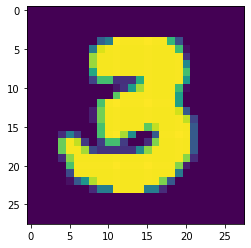

In [49]:
plt.imshow(test_features[loc])